In [18]:
# tools for data explanation and visualization
import shap
import seaborn as sns
from sklearn.metrics import confusion_matrix
# tools for data manipulation and munging
import pandas as pd
import numpy as np
# tools that create regression models 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [19]:
df=pd.read_csv(r".\heart.csv")
# analysis of data data 
print(f"shape of data: {df.shape}\ncolumns of data: {df.columns}\n\n\nnow, based on the data as seen from data header and the columns we will select the column that would be our target column ")
df.head(20)

shape of data: (303, 14)
columns of data: Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


now, based on the data as seen from data header and the columns we will select the column that would be our target column 


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


it is very lesr from the dataset that the target would be **output** parameter of the table also there is no need of pre processing becuse our data is in form of **float** and **int** data types that are acceptable by *decision tree based algorithms*

In [20]:
#here we are preparing the data for the processing and splitting the data given for test and train
df2=df.copy()
del df2['output']
y,x=df[df.columns[-1]],df2
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2)

In [21]:
# here we do the fitting of the model and generating the random forest
model= RandomForestRegressor()
# note we have kept the number of features as (features^0.5) because we want to make the maximum possibkle trees and at the same time accomodate for all the elements
model.fit(xtrain,ytrain)

RandomForestRegressor()

In [22]:
# here we are running the SHAP analysis algorithm that analyses the model based on  
# the concepts of game theory and can be used to explain the predictions of any machine learning model by calculating the contribution of each feature to the prediction.
explainer = shap.Explainer(model.predict, xtest)
shap_values = explainer(xtest)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


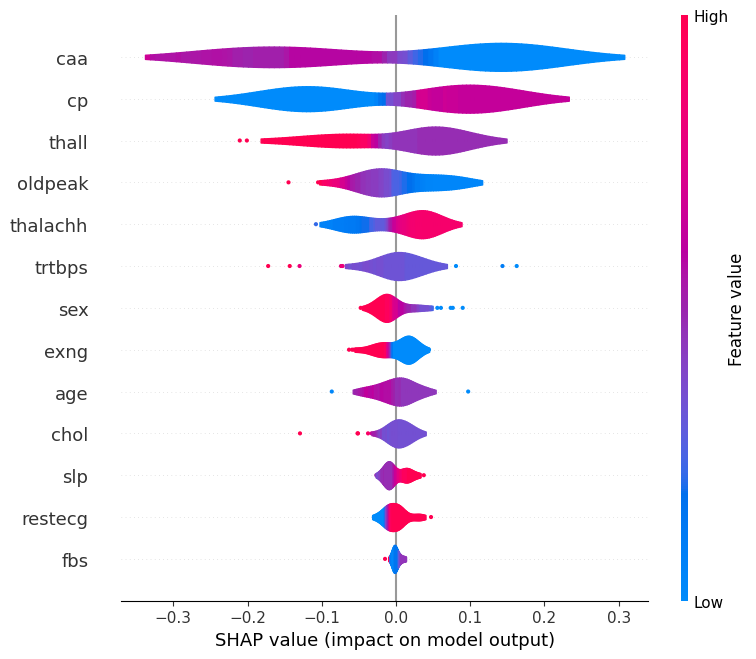

In [23]:
# this is a plot of the datapoints of shap model that explains the role of each feature on y-axis
# and its affects on the model's predicted value where red is high feature value and blue is low feature value that negatively or positively affects the prediction of the model
shap.summary_plot(shap_values,plot_type='violin')

In [24]:
pred=model.predict(xtest)
pred = np.where(pred<0.5, 0,1)

<AxesSubplot: >

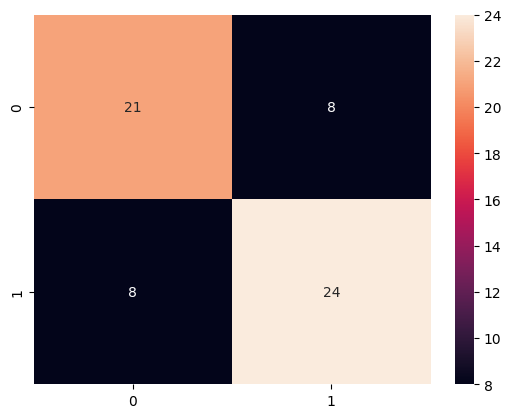

In [25]:
# generating a visual analysis of predictions using confusion matrix and seaborn library to generate matrix and heatmaps respectively
res = confusion_matrix(pred,ytest)
sns.heatmap(res, annot=True)

If we want to get the data of how the model works we can do with the plotting of the parameter tree using sklearn

we can also get the data as a parameterized text output using the sklearn metrics function taht generates results like:
-  explained variance
-  accuracy score
-  mean squared log error
-  r2
-  Mean Absolute Error
-  Mean Standard Error
-  Root Mean Square Error

In [31]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    acc = metrics.accuracy_score(y_true,y_pred)
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('accuracy: ', round(acc,4))
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [30]:
regression_results(ytest,pred)

accuracy:  0.7377
explained_variance:  -0.0517
mean_squared_log_error:  0.126
r2:  -0.0517
MAE:  0.2623
MSE:  0.2623
RMSE:  0.5121
